### Case Study 01: Customer Segmentation using K-Means Clustering

#### Author: KARTHIK THALLAM

### Description:

##### This is a trans-national data containing all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail

##### The company mainly sells unique all-occasion gifts

##### Many customers of the company are wholesalers

----------------------
### Data Dictionary:

##### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

##### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

##### Description: Product (item) name. Nominal.

##### Quantity: The quantities of each product (item) per transaction. Numeric.

##### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

##### UnitPrice: Unit price. Numeric, Product price per unit in sterling.

##### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

##### Country: Country name. Nominal, the name of the country where each customer resides

---------

### Customer Segmentation:

**Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services. The most common ways in which businesses segment their customer base are:**

**Demographic information:** `such as gender, age, familial and marital status, income, education, and occupation.`

**Geographical information:** `which differs depending on the scope of the company. For localized businesses, this info might pertain to specific towns or counties. For larger companies, it might mean a customer’s city, state, or even country of residence.`

**Psychographics:** `such as social class, lifestyle, and personality traits.`

**Behavioral data:** `such as spending and consumption habits, product/service usage, and desired benefits.`


### Advantages of Customer Segmentation:

    1. Determine appropriate product pricing.
    2. Develop customized marketing campaigns.
    3. Design an optimal distribution strategy.
    4. Choose specific product features for deployment. 
    5. Prioritize new product development efforts.

-------
### The Challenge:

**Our main goal is to cluster all the customers according to their attributes and gain more information about various customer patterns. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.**

------

#### 1) Import the Libraries and Packages:

In [1]:
import warnings
warnings.filterwarnings('ignore')        #to ignore the verbose created for warnings

import numpy as np                       #statistical analysis library
import pandas as pd                      #library handling for datasets and analysis on them
import matplotlib.pyplot as plt          #visualization library
import seaborn as sns                    #visualization library 
import datetime as dt
from sklearn.preprocessing import MinMaxScaler       #library for scaling the data
from sklearn.cluster import KMeans                   #Kmeans module for implementing Kmeans clustering method
from sklearn.metrics import silhouette_score         #metrics library for finding opt K value


#!pip install missingno
import missingno as msno                 #for analysing the missing values

#### Load the data:

In [2]:
df = pd.read_excel('Online Retail.xlsx')

#### 2) Data Teaser:

In [3]:
df.head(10)    #print first 10 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.tail(10)     #print last 10 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


#### 3) Data Types and Data Gist:

In [5]:
df.info()      #gives the overview of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.dtypes        #data types of each column in our dataframe

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

* `So, we have 1 date-time column showing the data and time for each transaction generated`


* `We have 2 columns of float type containing real values with integers and fraction parts`


* `We have 1 integer column which means +ve or -ve values with no decimal points`


* `We have 4 object type columns which means Categorical string data in Pandas where we can perform only string operations instead of mathematical operations`

In [7]:
df.shape    #shows the shape of the dataset

(541909, 8)

* `We have 541909 records spread across 8 field columns`

#### 4) Data Processing and Cleaning:

##### Missing data:

In [8]:
df.isnull().sum()      #gives the aggregated null value count in each column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* `We have 1454 missing values in Description field and 135080 missing values in CustomerId field`

##### Graphical representation of missing values:

<AxesSubplot:>

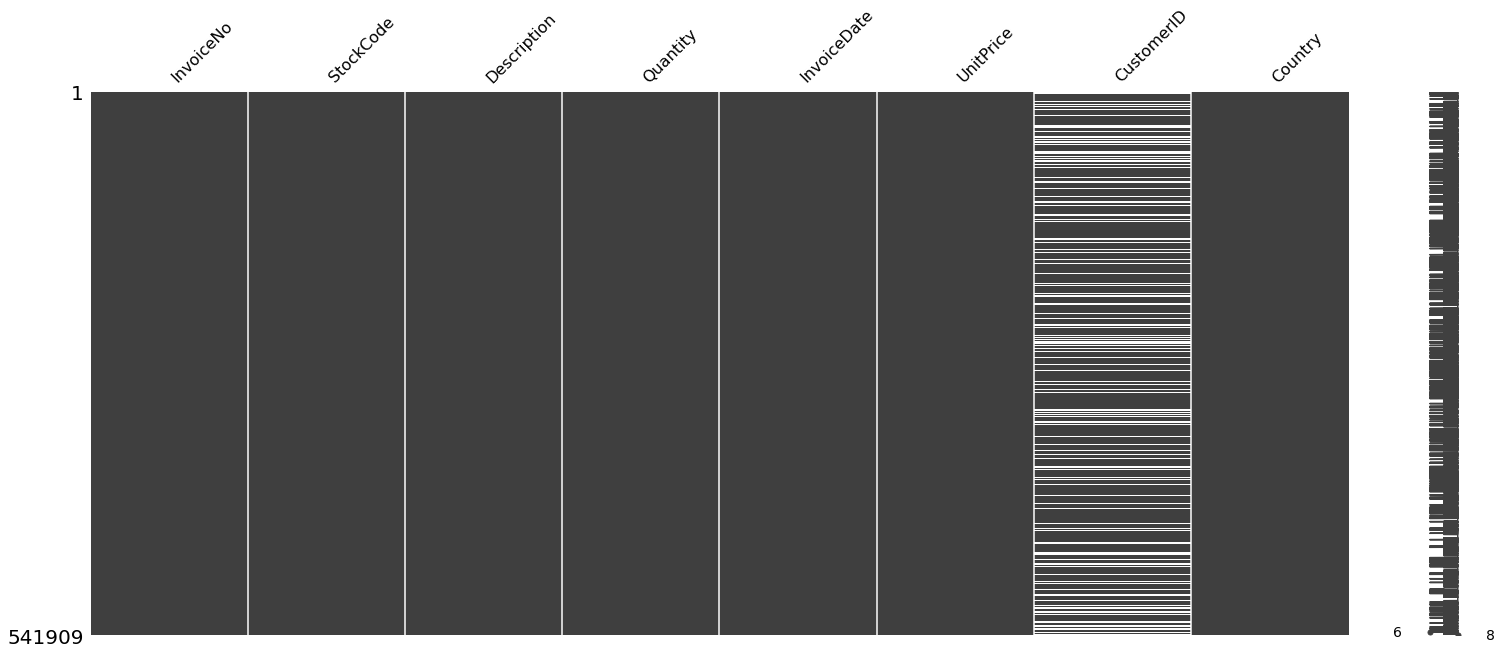

In [9]:
msno.matrix(df)

In [10]:
df['Description'].isnull().sum()    #missing values in Description column

1454

##### Let's see how much fraction of data we are missing:

In [11]:
df_null = df[df.isnull().any(axis=1)]     #A dataframe containing null values in any of the fields

df_null.shape

(135080, 8)

In [12]:
df_null_frac = df_null.shape[0]/df.shape[0]*100

df_null_frac            #shows the fraction of missing data compared to whole dataset

24.926694334288598

##### So, we are missing almost 25% of data while most of this missing data is due to CustomerID column

##### Let's drop Null values:

In [13]:
df = df.dropna()

In [14]:
df.info()     #overview of the dataset after removing null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


* `In the new dataset we have 406829 records spread across 8 columnar fields`

In [15]:
df.shape

(406829, 8)

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

* `We can see there are no Null values`

#### 5) Creating a new column as total value according to the unit price and quantity purchased

In [17]:
df['Total Value'] = df['Quantity'] * df['UnitPrice']

df.head()      

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### 6) Clustering the customers according to Amount spent

In [18]:
df['CustomerID'].value_counts().head(10)     #to see the top 10 customers who bought most no. of times

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: CustomerID, dtype: int64

In [19]:
unique_customer = df.groupby('CustomerID')['Total Value'].sum()   #aggregating the total amount spent by each unique customer

In [20]:
unique_customer = unique_customer.reset_index()       #for setting the index

unique_customer

,CustomerID,Total Value
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


##### The above dataframe shows each unique customer along with the total amount they have spent

##### Now, let's see the top 10 customers who spent the most: 

In [21]:
unique_customer.sort_values(by=['Total Value'], ascending=False).head(10)     #sorting the values by Total Value

,CustomerID,Total Value
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
1345,14156.0,113384.14
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62653.10
2192,15311.0,59419.34


##### We can see that the customer with customerID '14646' spent the most with a total value of 278489.02 

#### 7) Finding out how many times a Customer has visited the store by the column Invoice:

In [22]:
customer_freq = df.groupby('CustomerID')['InvoiceNo'].count()    #aggregating the total no. of visits by each unique customer 

customer_freq = customer_freq.reset_index()

customer_freq.columns = ['CustomerID', 'Frequency']        #assigning the column names

customer_freq

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


##### Let's see the top 10 customers who visited the store online most no. of times and bought atleast one item:

In [23]:
customer_freq.sort_values(by=['Frequency'], ascending=False).head(10)     #sorting the values by Frequency

,CustomerID,Frequency
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
2192,15311.0,2491
1703,14646.0,2085
568,13089.0,1857
698,13263.0,1677
1447,14298.0,1640


##### We can see that the customer with customerID: 17841 has visited and bought an item online most no. of times

#### 8) Let's merge the above two dataframes:

In [24]:
customer_info = pd.merge(unique_customer, customer_freq, on='CustomerID')      #merging the two dataframes

customer_info

,CustomerID,Total Value,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


##### We can also get more details like which customer has not visited the store for a long time and see the underlying patterns

#### 9) Making sure that the column ‘InvoiceDate’ is in datetime format:

In [25]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Total Value           float64
dtype: object

* `We can see that InvoiceDate column is in datetime format`

#### 10) Cluster Customers which have not visited the store for long time and see the underlying pattern. To compute the exact number of days a customer has been last active, we will use the ”InvoiceDate” column to find out the most recent date from the InvoiceDate column and then subtract the Maximum date with the Invoice date for each customer which will give us no. of days the customer was last active.

In [26]:
max_date = max(df['InvoiceDate'])   #to find the highest date in Dataframe

max_date

Timestamp('2011-12-09 12:50:00')

In [27]:
df['Offline'] = max_date - df['InvoiceDate']      #to see the Offline/Active status of each customer

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Value,Offline
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


##### Let's group by each customer and take out min from the Offline column to get the exact no. of days the customer was last seen or being offline:

In [28]:
Offline_days = df.groupby('CustomerID')['Offline'].min()       #aggregating the min time by cutomerID 

Offline_days = Offline_days.reset_index()

Offline_days

,CustomerID,Offline
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


##### Let's try to get the exact no. of days value from the Offline column: 

In [29]:
Offline_days['Offline'] = Offline_days['Offline'].dt.days     #dt.days extracts the no. of days from each record of the field by removing time value

Offline_days

,CustomerID,Offline
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


#### 11) Let's merge the above dataframe with customer_info dataframe for getting a broader picture:

In [30]:
customer_details = pd.merge(Offline_days, customer_info, on='CustomerID', how='inner')  #merging all the above dataframes

customer_details.columns = ['CustomerID', 'OfflineDays','TotalAmountSpent', 'Frequency']

customer_details.head(10)

,CustomerID,OfflineDays,TotalAmountSpent,Frequency
0,12346.0,325,0.00,2
1,12347.0,1,4310.00,182
2,12348.0,74,1797.24,31
3,12349.0,18,1757.55,73
4,12350.0,309,334.40,17
5,12352.0,35,1545.41,95
6,12353.0,203,89.00,4
7,12354.0,231,1079.40,58
8,12355.0,213,459.40,13
9,12356.0,22,2811.43,59


#### 12) Applying Kmeans clustering algorithm. Providing ‘K’ value for the algorithm as the no of clusters. Finding out the optimal value for K with elbow graph:

##### Let's make our data more cleaner for the model to perform better. So, Let's remove the outliers and scale the date:

<AxesSubplot:>

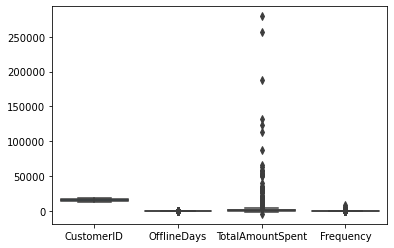

In [31]:
sns.boxplot(data=customer_details)       #boxplot to show the outliers and range of the data values

* `We can see that there are a few outliers in our data. Let's fix them:`

In [32]:
Q1 = customer_details.TotalAmountSpent.quantile(0.05)
Q3 = customer_details.TotalAmountSpent.quantile(0.95)
IQR = Q3 - Q1

customer_details = customer_details[(customer_details.TotalAmountSpent >= Q1 - 1.5*IQR) & (customer_details.TotalAmountSpent <= Q3 + 1.5*IQR)]

Q1 = customer_details.OfflineDays.quantile(0.05)
Q3 = customer_details.OfflineDays.quantile(0.95)
IQR = Q3 - Q1

customer_details= customer_details[(customer_details.OfflineDays >= Q1 - 1.5*IQR) & (customer_details.OfflineDays <= Q3 + 1.5*IQR)]

Q1 = customer_details.Frequency.quantile(0.05)
Q3 = customer_details.Frequency.quantile(0.95)
IQR = Q3 - Q1

customer_details = customer_details[(customer_details.Frequency >= Q1 - 1.5*IQR) & (customer_details.Frequency <= Q3 + 1.5*IQR)]

##### The above code is calculating the Inter Quartile range and substracting the values of the data from IQR to find the outliers and removing them

##### Let's check the shape of our dataframe after removing the outliers:

In [33]:
customer_details.shape

(4293, 4)

#### Let's scale the data as we can see a lot of difference in the range of values between the columns:

In [36]:
scaler = MinMaxScaler()    #creating an instance for MinMaxscaler object

scaled_data = scaler.fit_transform(customer_details[['OfflineDays', 'TotalAmountSpent', 'Frequency']])    #applying the scaler params and transforming data

scaled_data.shape

(4293, 3)

In [38]:
scaled_data = pd.DataFrame(scaled_data)       #making the scaled data values fitting into a dataframe

scaled_data.columns = ['OfflineDays', 'TotalAmountSpent', 'Frequency']

scaled_data

,OfflineDays,TotalAmountSpent,Frequency
0,0.871314,0.238663,0.001395
1,0.002681,0.478571,0.252441
2,0.198391,0.338703,0.041841
3,0.048257,0.336494,0.100418
4,0.828418,0.257277,0.022315
...,...,...,...
4288,0.195710,0.248343,0.011158
4289,0.742627,0.248716,0.012552
4290,0.482574,0.243162,0.008368
4291,0.018767,0.248493,0.016736


### Let's start Model Building:
--------
**Using Elbow Method, let's find the optimal K value:**

In [43]:
scores = []

#checking the k values from 2 to 8
for k in range(2, 9):
    
    kmeans= KMeans(n_clusters = k, max_iter = 50, verbose=False).fit(scaled_data)    #taking 50 iterations for one consideration
    scores.append(kmeans.inertia_)
    
    
len(scores)

7

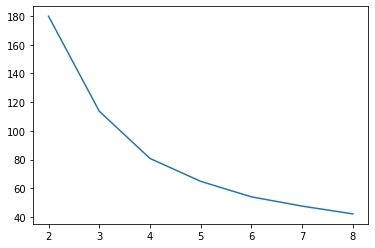

In [44]:
plt.plot(range(2,9,1), scores)      #plotting a line graph for k-value in the range against the scores obtained
plt.xticks(ticks=range(2,9))
plt.show()

#### Silhouette Analysis

* silhouette score=𝑝−𝑞/𝑚𝑎𝑥(𝑝,𝑞)

* 𝑝 is the mean distance to the points in the nearest cluster that the data point is not a part of

* 𝑞 is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1.

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [45]:
#checking the k values from 2 to 8
for k in range(2,9):
    
    kmeans = KMeans(n_clusters=k, max_iter=50).fit(scaled_data)     #taking 50 iterations for one consideration
    cluster_labels = kmeans.labels_ 
    silhaoutte_avg = silhouette_score(scaled_data, cluster_labels)   #calculating the silhaoutte score for each cluster
    
    print('For {} clusters, the silhaoutte score is {}'. format(k, silhaoutte_avg))

For 2 clusters, the silhaoutte score is 0.5889064222823147
For 3 clusters, the silhaoutte score is 0.5489370253660052
For 4 clusters, the silhaoutte score is 0.5037705316426293
For 5 clusters, the silhaoutte score is 0.4482408170286267
For 6 clusters, the silhaoutte score is 0.4040369658704452
For 7 clusters, the silhaoutte score is 0.3859503328418999
For 8 clusters, the silhaoutte score is 0.3795309139936023


##### To determine the optimal number of clusters, we have to select the value of k at the “elbow” which is the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

### K-Means clustering with k = 3 :

In [46]:
kmeans=KMeans(n_clusters=3, max_iter=50).fit(scaled_data)      #applying Kmeans clustering with k=3 on the scaled data

clusters = kmeans.labels_

In [47]:
customer_details['Group'] = clusters     #adding group column for segmenting each record into its respected grp

customer_details

,CustomerID,OfflineDays,TotalAmountSpent,Frequency,Group
0,12346.0,325,0.00,2,1
1,12347.0,1,4310.00,182,2
2,12348.0,74,1797.24,31,0
3,12349.0,18,1757.55,73,0
4,12350.0,309,334.40,17,1
...,...,...,...,...,...
4366,18278.0,73,173.90,9,0
4367,18280.0,277,180.60,10,1
4368,18281.0,180,80.82,7,1
4369,18282.0,7,176.60,13,0


#### 13) Let's visualize the clusters formed on different features:

Text(0.5, 1.0, 'Clustered Groups based on Total Amount Spent')

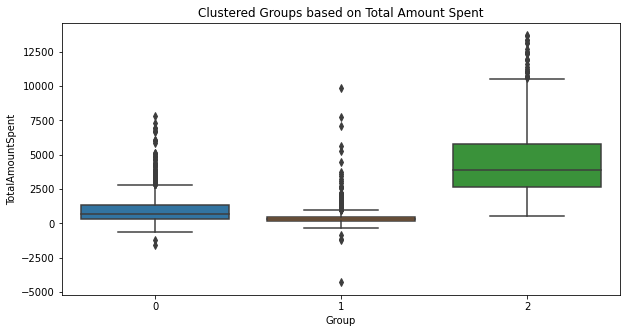

In [53]:
fig = plt.figure(figsize=(10,5))     #resizing the canvas

sns.boxplot(x='Group', y='TotalAmountSpent', data=customer_details)

plt.title('Clustered Groups based on Total Amount Spent')

Text(0.5, 1.0, 'Clustered Groups based on No. of times Customer visited successfully')

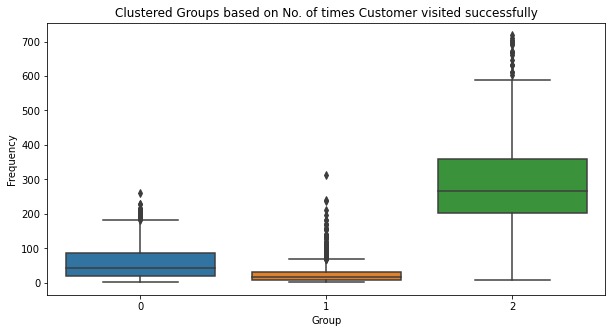

In [54]:
fig = plt.figure(figsize=(10,5))    #resizing the canvas

sns.boxplot(x='Group', y='Frequency', data=customer_details)

plt.title('Clustered Groups based on No. of times Customer visited successfully')

Text(0.5, 1.0, 'Clustered Groups based on how many Days Customer has been Inert')

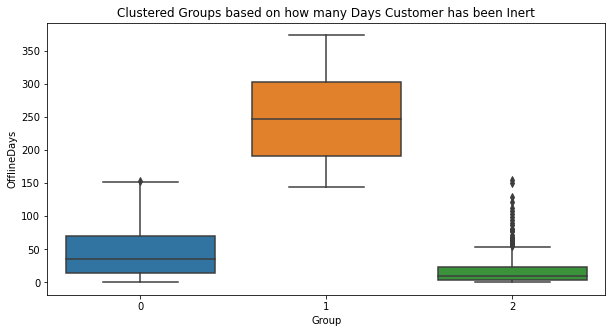

In [55]:
fig = plt.figure(figsize=(10,5))      #resizing the canvas

sns.boxplot(x='Group', y='OfflineDays', data=customer_details)

plt.title('Clustered Groups based on how many Days Customer has been Inert')

### 14) Outcomes and Findings:

##### 1) We have seen after k=3, the inertia has been decareasing in a linear fashion. Hence, we have taken 3 as the optimum k-value

##### 2) So, we have segmented the dataset into 3 groups: Group0, Group1, Group2

##### 3) We have seen that Group1 people have spent the least Total Amount with a range of values between 0 and 300 sterlings. While, Group3 people have spent the most Total Amount with a range of values between 2600 and 5200 sterlings. However, Group0 people have spent the moderate Total amount with a range of values between 0 and  1250 sterlings

##### 4) We have seen that Group1 people have visited the store online least no. of times with a range of values between 1 and 25 visits. While, Group3 people have visited the store online and bought atleast one item,  with a range of values between 200 and 390 visits. However, Group0 people have visited the store online and bought atleast one item, with a range of values between 20 and 95 visits in general

##### 5) It is very clear that, customers belonged to Group1 have been not showing much interest in buying at the store online, for which it can be seen they have spent the least total amount and very less no. of visits. We can also see that these are the customers that have been inactive for large no. of days (haven't bought a single item for a long period). 

##### 6) While customers belonged to Group2 have shown great interest in buying at the store online, for which it can be seen they have spent the highest total amount and highest no. of visits. We can also see that these are the customers that have been active. (have been buying atleast a single item in regular intervals). 

##### 7) While customers belonged to Group0 have shown moderate interest in buying at the store online, for which it can be seen they have spent moderate total amount and second highest no. of visits. We can also see that these are the customers that have been inactive only for short intervals. (have been buying atleast a single item in prolonged intervals). 